                                         MPI LAPLACE SOLVER PERFORMANCE RESULTS                                         
 Implementation  Processes  Iterations  Converged  Final_Error  Time_Seconds  Speedup  Efficiency  Iterations_Per_Second
       Original          4        3372       True        0.010         6.039      NaN         NaN                558.412
   1D Optimized          1        3372       True        0.010        21.855    1.000       1.000                154.293
   1D Optimized          4        3372       True        0.010         6.079    3.595       0.899                554.667
   1D Optimized          8        3372       True        0.010         3.667    5.960       0.745                919.589
   2D Optimized          1        4000      False       20.923        26.028    1.000       1.000                153.682
   2D Optimized          4        4000      False       20.923         7.397    3.519       0.880                540.786
   2D Optimized          8      

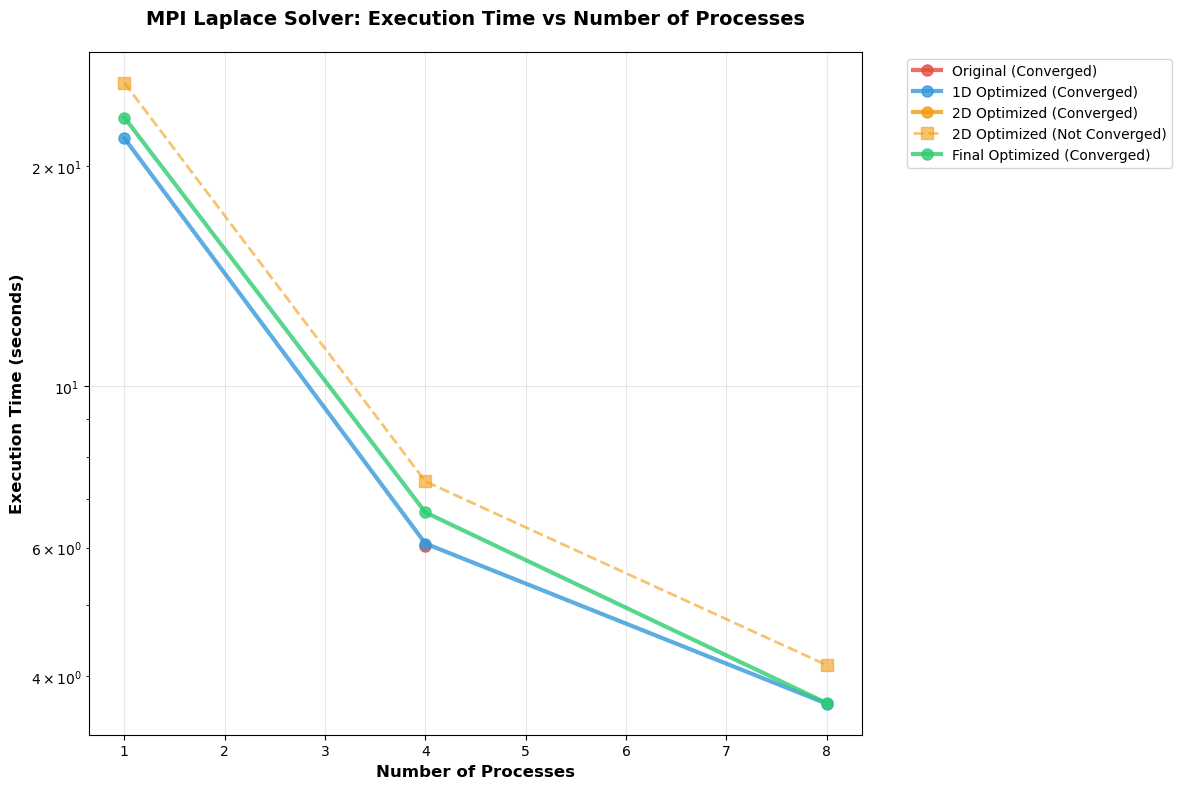

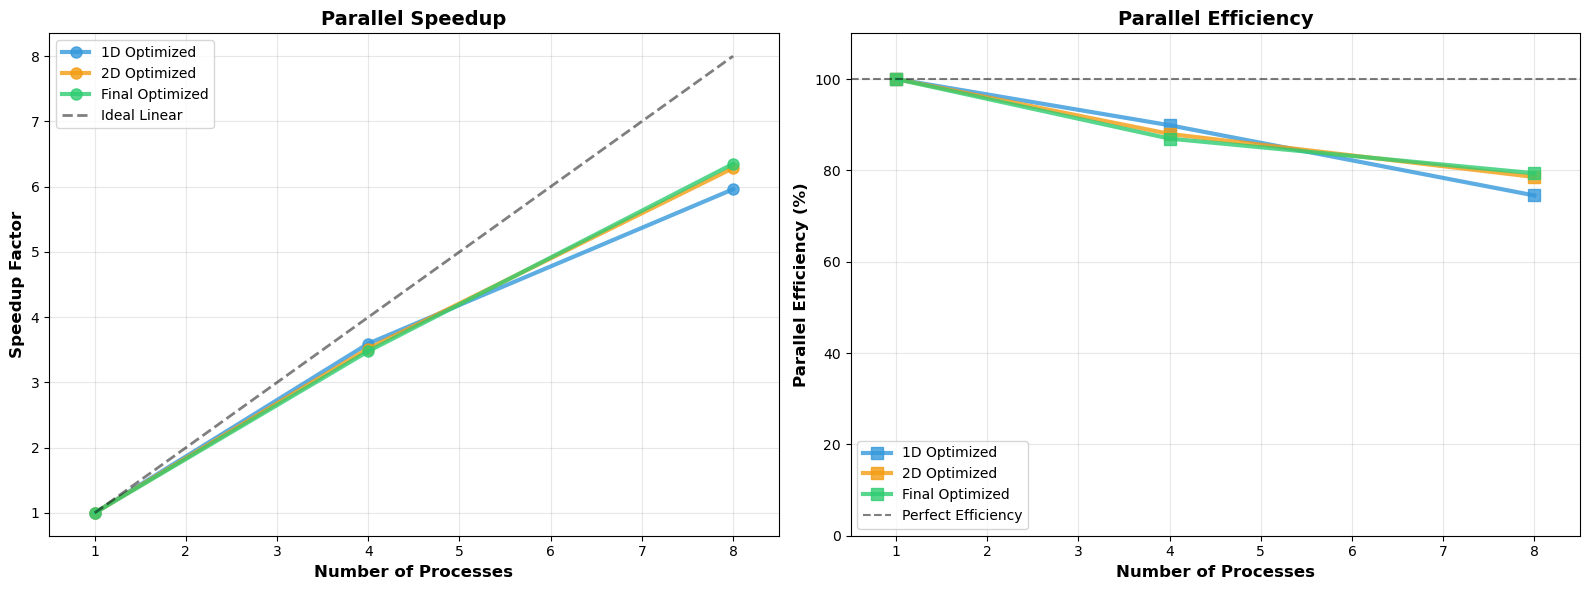

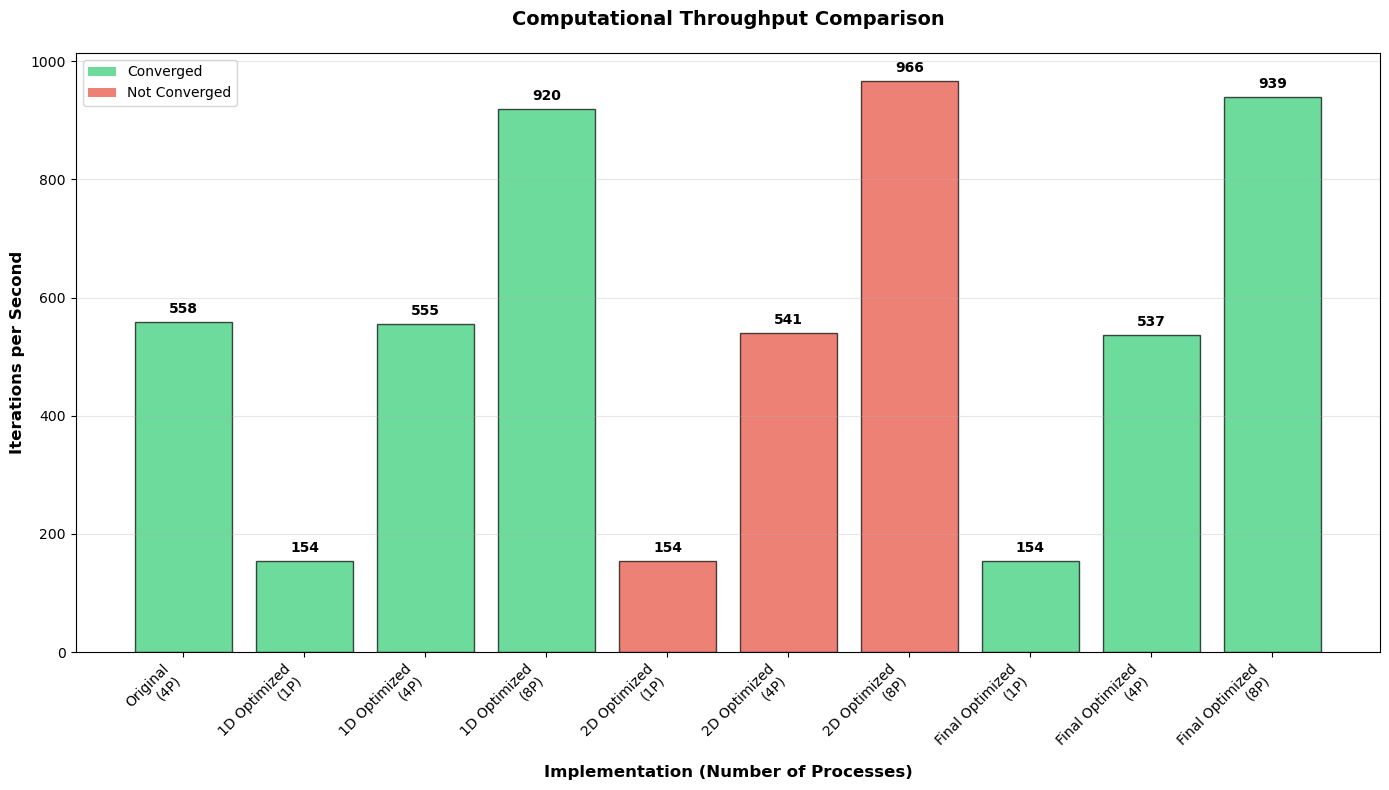

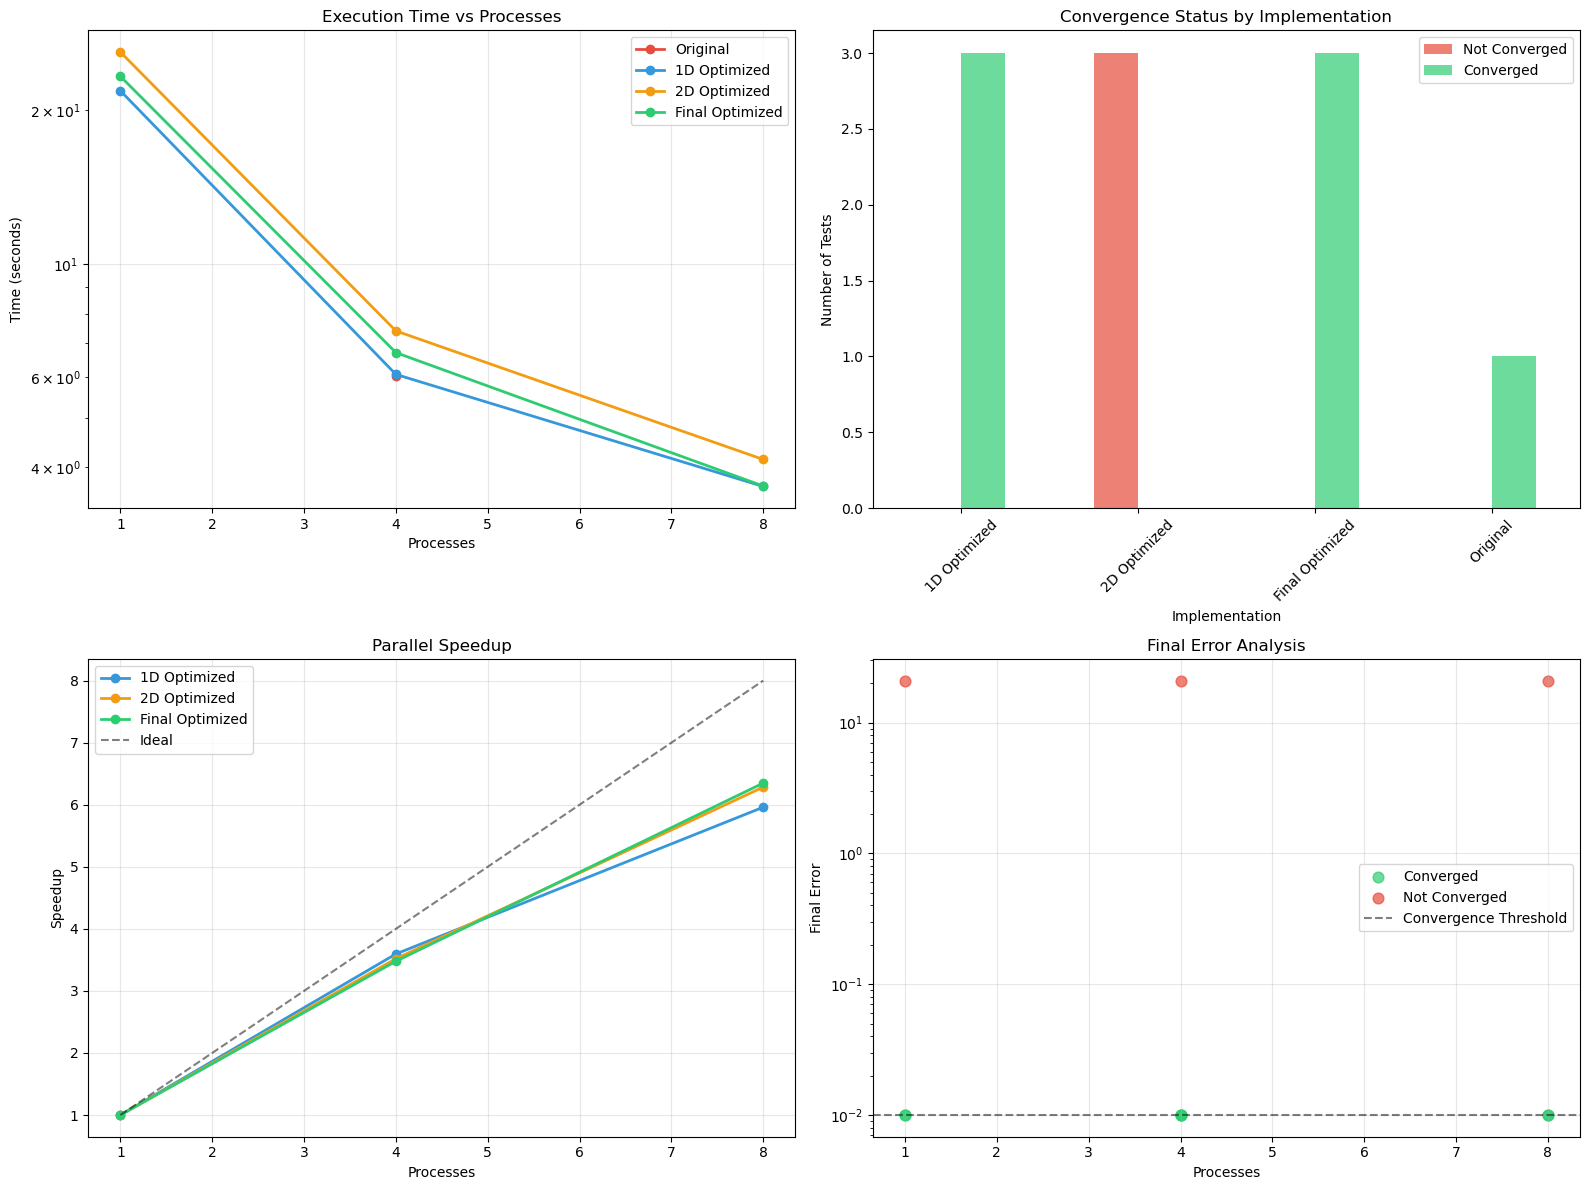


Data saved to 'mpi_performance_analysis.csv'

                                  KEY INSIGHTS                                  
🏆 Best Performance: 1D Optimized with 8 processes
   ⏱️  Execution Time: 3.667 seconds
🚀 Best Speedup: Final Optimized with 8 processes
   📈 Speedup Factor: 6.35x
⚡ Average 8-Process Efficiency: 76.9%
❌ 2D Optimized failed to converge in all tests (max iterations reached)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

def load_data():
    """Load the MPI performance data"""
    data = [
        {"Implementation": "Original", "Processes": 4, "Iterations": 3372, "Converged": True, "Final_Error": 0.009995, "Time_Seconds": 6.038548, "Speedup": None, "Efficiency": None, "Iterations_Per_Second": 558.412387},
        {"Implementation": "1D Optimized", "Processes": 1, "Iterations": 3372, "Converged": True, "Final_Error": 0.009995, "Time_Seconds": 21.854539, "Speedup": 1.0, "Efficiency": 1.0, "Iterations_Per_Second": 154.292891},
        {"Implementation": "1D Optimized", "Processes": 4, "Iterations": 3372, "Converged": True, "Final_Error": 0.009995, "Time_Seconds": 6.079321, "Speedup": 3.594898, "Efficiency": 0.898725, "Iterations_Per_Second": 554.667207},
        {"Implementation": "1D Optimized", "Processes": 8, "Iterations": 3372, "Converged": True, "Final_Error": 0.009995, "Time_Seconds": 3.666854, "Speedup": 5.960024, "Efficiency": 0.745003, "Iterations_Per_Second": 919.589381},
        {"Implementation": "2D Optimized", "Processes": 1, "Iterations": 4000, "Converged": False, "Final_Error": 20.922598, "Time_Seconds": 26.027700, "Speedup": 1.0, "Efficiency": 1.0, "Iterations_Per_Second": 153.682423},
        {"Implementation": "2D Optimized", "Processes": 4, "Iterations": 4000, "Converged": False, "Final_Error": 20.922598, "Time_Seconds": 7.396640, "Speedup": 3.518855, "Efficiency": 0.879714, "Iterations_Per_Second": 540.786087},
        {"Implementation": "2D Optimized", "Processes": 8, "Iterations": 4000, "Converged": False, "Final_Error": 20.922598, "Time_Seconds": 4.141792, "Speedup": 6.284164, "Efficiency": 0.785520, "Iterations_Per_Second": 965.765543},
        {"Implementation": "Final Optimized", "Processes": 1, "Iterations": 3602, "Converged": True, "Final_Error": 0.009998, "Time_Seconds": 23.325403, "Speedup": 1.0, "Efficiency": 1.0, "Iterations_Per_Second": 154.423913},
        {"Implementation": "Final Optimized", "Processes": 4, "Iterations": 3602, "Converged": True, "Final_Error": 0.009998, "Time_Seconds": 6.706944, "Speedup": 3.477799, "Efficiency": 0.869450, "Iterations_Per_Second": 537.055327},
        {"Implementation": "Final Optimized", "Processes": 8, "Iterations": 3449, "Converged": True, "Final_Error": 0.009999, "Time_Seconds": 3.673978, "Speedup": 6.348814, "Efficiency": 0.793602, "Iterations_Per_Second": 938.764467}
    ]
    return pd.DataFrame(data)

def print_table(df):
    """Print a nicely formatted table"""
    print("=" * 120)
    print("MPI LAPLACE SOLVER PERFORMANCE RESULTS".center(120))
    print("=" * 120)
    
    # Create a formatted display
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.float_format', '{:.3f}'.format)
    
    print(df.to_string(index=False))
    
    print("\n" + "=" * 120)
    print("SUMMARY STATISTICS".center(120))
    print("=" * 120)
    
    # Convergence summary
    print("\nConvergence Analysis:")
    convergence_summary = df.groupby('Implementation').agg({
        'Converged': ['count', 'sum'],
        'Time_Seconds': 'mean'
    }).round(3)
    convergence_summary.columns = ['Total_Tests', 'Converged_Tests', 'Avg_Time']
    convergence_summary['Convergence_Rate'] = (convergence_summary['Converged_Tests'] / convergence_summary['Total_Tests'] * 100).round(1)
    print(convergence_summary)
    
    # Performance summary for converged tests only
    print("\nPerformance Analysis (Converged Tests Only):")
    converged_df = df[df['Converged'] == True]
    if not converged_df.empty:
        perf_summary = converged_df.groupby('Implementation').agg({
            'Time_Seconds': ['min', 'max', 'mean'],
            'Speedup': 'max',
            'Efficiency': 'mean',
            'Iterations_Per_Second': 'max'
        }).round(3)
        print(perf_summary)

def create_execution_time_plot(df):
    """Create execution time comparison plot"""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    implementations = df['Implementation'].unique()
    colors = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']
    
    for i, impl in enumerate(implementations):
        impl_data = df[df['Implementation'] == impl]
        processes = impl_data['Processes'].values
        times = impl_data['Time_Seconds'].values
        
        # Use different markers for converged vs non-converged
        converged_mask = impl_data['Converged'].values
        
        ax.plot(processes[converged_mask], times[converged_mask], 
               'o-', color=colors[i], linewidth=3, markersize=8, 
               label=f'{impl} (Converged)', alpha=0.8)
        
        if not all(converged_mask):
            ax.plot(processes[~converged_mask], times[~converged_mask], 
                   's--', color=colors[i], linewidth=2, markersize=8, 
                   label=f'{impl} (Not Converged)', alpha=0.6)
    
    ax.set_xlabel('Number of Processes', fontsize=12, fontweight='bold')
    ax.set_ylabel('Execution Time (seconds)', fontsize=12, fontweight='bold')
    ax.set_title('MPI Laplace Solver: Execution Time vs Number of Processes', 
                fontsize=14, fontweight='bold', pad=20)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')  # Log scale for better visualization
    
    plt.tight_layout()
    plt.show()

def create_speedup_efficiency_plot(df):
    """Create speedup and efficiency plots"""
    # Filter out implementations with speedup data
    speedup_df = df[df['Speedup'].notna() & (df['Implementation'] != 'Original')]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    implementations = speedup_df['Implementation'].unique()
    colors = ['#3498db', '#f39c12', '#2ecc71']
    
    # Speedup plot
    for i, impl in enumerate(implementations):
        impl_data = speedup_df[speedup_df['Implementation'] == impl]
        processes = impl_data['Processes'].values
        speedup = impl_data['Speedup'].values
        
        ax1.plot(processes, speedup, 'o-', color=colors[i], 
                linewidth=3, markersize=8, label=impl, alpha=0.8)
    
    # Ideal linear speedup
    ax1.plot([1, 4, 8], [1, 4, 8], 'k--', linewidth=2, alpha=0.5, label='Ideal Linear')
    
    ax1.set_xlabel('Number of Processes', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Speedup Factor', fontsize=12, fontweight='bold')
    ax1.set_title('Parallel Speedup', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0.5, 8.5)
    
    # Efficiency plot
    for i, impl in enumerate(implementations):
        impl_data = speedup_df[speedup_df['Implementation'] == impl]
        processes = impl_data['Processes'].values
        efficiency = impl_data['Efficiency'].values * 100
        
        ax2.plot(processes, efficiency, 's-', color=colors[i], 
                linewidth=3, markersize=8, label=impl, alpha=0.8)
    
    ax2.axhline(y=100, color='k', linestyle='--', alpha=0.5, label='Perfect Efficiency')
    ax2.set_xlabel('Number of Processes', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Parallel Efficiency (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Parallel Efficiency', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0.5, 8.5)
    ax2.set_ylim(0, 110)
    
    plt.tight_layout()
    plt.show()

def create_throughput_comparison(df):
    """Create throughput comparison chart"""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create labels combining implementation and process count
    df['Label'] = df['Implementation'] + '\n(' + df['Processes'].astype(str) + 'P)'
    
    # Color by convergence status
    colors = ['#2ecc71' if converged else '#e74c3c' for converged in df['Converged']]
    
    bars = ax.bar(range(len(df)), df['Iterations_Per_Second'], 
                  color=colors, alpha=0.7, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, df['Iterations_Per_Second'])):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{value:.0f}', ha='center', va='bottom', fontweight='bold')
    
    ax.set_xlabel('Implementation (Number of Processes)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Iterations per Second', fontsize=12, fontweight='bold')
    ax.set_title('Computational Throughput Comparison', fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['Label'], rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add legend for colors
    converged_patch = Rectangle((0, 0), 1, 1, fc='#2ecc71', alpha=0.7, label='Converged')
    not_converged_patch = Rectangle((0, 0), 1, 1, fc='#e74c3c', alpha=0.7, label='Not Converged')
    ax.legend(handles=[converged_patch, not_converged_patch], loc='upper left')
    
    plt.tight_layout()
    plt.show()

def create_comprehensive_analysis(df):
    """Create a comprehensive 2x2 subplot analysis"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Execution Time by Implementation
    implementations = df['Implementation'].unique()
    colors = ['#e74c3c', '#3498db', '#f39c12', '#2ecc71']
    
    for i, impl in enumerate(implementations):
        impl_data = df[df['Implementation'] == impl]
        ax1.plot(impl_data['Processes'], impl_data['Time_Seconds'], 
                'o-', color=colors[i], linewidth=2, markersize=6, label=impl)
    
    ax1.set_xlabel('Processes')
    ax1.set_ylabel('Time (seconds)')
    ax1.set_title('Execution Time vs Processes')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')
    
    # 2. Convergence Status
    convergence_counts = df.groupby(['Implementation', 'Converged']).size().unstack(fill_value=0)
    convergence_counts.plot(kind='bar', ax=ax2, color=['#e74c3c', '#2ecc71'], alpha=0.7)
    ax2.set_title('Convergence Status by Implementation')
    ax2.set_xlabel('Implementation')
    ax2.set_ylabel('Number of Tests')
    ax2.legend(['Not Converged', 'Converged'])
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Speedup Analysis (excluding Original)
    speedup_df = df[df['Speedup'].notna()]
    for i, impl in enumerate(speedup_df['Implementation'].unique()):
        impl_data = speedup_df[speedup_df['Implementation'] == impl]
        color_idx = list(implementations).index(impl)
        ax3.plot(impl_data['Processes'], impl_data['Speedup'], 
                'o-', color=colors[color_idx], linewidth=2, markersize=6, label=impl)
    
    ax3.plot([1, 4, 8], [1, 4, 8], 'k--', alpha=0.5, label='Ideal')
    ax3.set_xlabel('Processes')
    ax3.set_ylabel('Speedup')
    ax3.set_title('Parallel Speedup')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Error Analysis
    df_converged = df[df['Converged'] == True]
    df_not_converged = df[df['Converged'] == False]
    
    if not df_converged.empty:
        ax4.scatter(df_converged['Processes'], df_converged['Final_Error'], 
                   color='#2ecc71', s=60, alpha=0.7, label='Converged')
    if not df_not_converged.empty:
        ax4.scatter(df_not_converged['Processes'], df_not_converged['Final_Error'], 
                   color='#e74c3c', s=60, alpha=0.7, label='Not Converged')
    
    ax4.axhline(y=0.01, color='black', linestyle='--', alpha=0.5, label='Convergence Threshold')
    ax4.set_xlabel('Processes')
    ax4.set_ylabel('Final Error')
    ax4.set_title('Final Error Analysis')
    ax4.set_yscale('log')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def main():
    """Main function to run all analyses"""
    # Load data
    df = load_data()
    
    # Print formatted table
    print_table(df)
    
    # Create visualizations
    print("\nGenerating visualizations...")
    
    create_execution_time_plot(df)
    create_speedup_efficiency_plot(df)
    create_throughput_comparison(df)
    create_comprehensive_analysis(df)
    
    # Save data to CSV
    df.to_csv('mpi_performance_analysis.csv', index=False)
    print(f"\nData saved to 'mpi_performance_analysis.csv'")
    
    # Print key insights
    print("\n" + "="*80)
    print("KEY INSIGHTS".center(80))
    print("="*80)
    
    converged_df = df[df['Converged'] == True]
    if not converged_df.empty:
        best_time = converged_df.loc[converged_df['Time_Seconds'].idxmin()]
        print(f"🏆 Best Performance: {best_time['Implementation']} with {best_time['Processes']} processes")
        print(f"   ⏱️  Execution Time: {best_time['Time_Seconds']:.3f} seconds")
        
        best_speedup = converged_df[converged_df['Speedup'].notna()].loc[converged_df['Speedup'].idxmax()]
        print(f"🚀 Best Speedup: {best_speedup['Implementation']} with {best_speedup['Processes']} processes")
        print(f"   📈 Speedup Factor: {best_speedup['Speedup']:.2f}x")
        
        avg_efficiency_8p = converged_df[converged_df['Processes'] == 8]['Efficiency'].mean()
        print(f"⚡ Average 8-Process Efficiency: {avg_efficiency_8p*100:.1f}%")
        
        print(f"❌ 2D Optimized failed to converge in all tests (max iterations reached)")

if __name__ == "__main__":
    main()